In [1]:
# pip install tensorflow

In [2]:
import random
import numpy as np 

In [3]:
import tensorflow

In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
def random_operator():
    if random.random() < 0.5:
        return '+'
    else:
        return '-'

In [7]:
def random_num():
    return random.randint(0, 99)

In [8]:
query = str(random_num()) + random_operator() + str(random_num())
print(eval(query))

59


In [9]:
queries = []
for i in range(0, 100):
    row = []
    for j in range(0, 100):
        query = str(i) +"+" + str(j)
        row.append([query])
        if eval(query) < 0:
            answer = str(eval(query)) 
        else:
            answer = "+" + str(eval(query))
        row[-1].append(answer)
        query = str(i) +"-" + str(j)
        row.append([query])
        if eval(query) < 0:
            answer = str(eval(query)) 
        else:
            answer = str(eval(query))
        row[-1].append(answer)
        
    queries.append(row) 

In [10]:
print(queries)


[[['0+0', '+0'], ['0-0', '0'], ['0+1', '+1'], ['0-1', '-1'], ['0+2', '+2'], ['0-2', '-2'], ['0+3', '+3'], ['0-3', '-3'], ['0+4', '+4'], ['0-4', '-4'], ['0+5', '+5'], ['0-5', '-5'], ['0+6', '+6'], ['0-6', '-6'], ['0+7', '+7'], ['0-7', '-7'], ['0+8', '+8'], ['0-8', '-8'], ['0+9', '+9'], ['0-9', '-9'], ['0+10', '+10'], ['0-10', '-10'], ['0+11', '+11'], ['0-11', '-11'], ['0+12', '+12'], ['0-12', '-12'], ['0+13', '+13'], ['0-13', '-13'], ['0+14', '+14'], ['0-14', '-14'], ['0+15', '+15'], ['0-15', '-15'], ['0+16', '+16'], ['0-16', '-16'], ['0+17', '+17'], ['0-17', '-17'], ['0+18', '+18'], ['0-18', '-18'], ['0+19', '+19'], ['0-19', '-19'], ['0+20', '+20'], ['0-20', '-20'], ['0+21', '+21'], ['0-21', '-21'], ['0+22', '+22'], ['0-22', '-22'], ['0+23', '+23'], ['0-23', '-23'], ['0+24', '+24'], ['0-24', '-24'], ['0+25', '+25'], ['0-25', '-25'], ['0+26', '+26'], ['0-26', '-26'], ['0+27', '+27'], ['0-27', '-27'], ['0+28', '+28'], ['0-28', '-28'], ['0+29', '+29'], ['0-29', '-29'], ['0+30', '+30'], ['

In [11]:
np.shape(queries)

(100, 200, 2)

In [12]:
queries_2d = []
for i in range(len(queries)):
    for j in range(len(queries[i])):
        queries_2d.append(queries[i][j])

In [13]:
import numpy as np 


In [14]:
np.shape(queries)

(100, 200, 2)

In [15]:
# Assuming `data` is a list of (query, answer) pairs
random.shuffle(queries_2d)


In [16]:
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', ' ']

In [17]:
def one_hot_encode(string, length):
    encoded = np.zeros((length, len(alphabet)))
    for i, char in enumerate(string):
        index = alphabet.index(char)
        encoded[i][index] = 1
    return encoded


In [18]:
queries_encoded = np.zeros((20000, 5, 13))
answers_encoded = np.zeros((20000, 4, 13))

In [19]:
for i in range(10000):
        query = queries_2d[i][0]
        answer = queries_2d[i][1]
        queries_encoded[i] = one_hot_encode(query, 5)
        answers_encoded[i] = one_hot_encode(answer, 4)

In [20]:
print(queries_encoded)

[[[0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [21]:
print(answers_encoded)

[[[0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [22]:
model = Sequential()
model.add(LSTM(128, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(13, activation='softmax'))


In [23]:
queries_2d

[['1-37', '-36'],
 ['69+0', '+69'],
 ['64+66', '+130'],
 ['55-60', '-5'],
 ['31-18', '13'],
 ['16+58', '+74'],
 ['41+5', '+46'],
 ['28-86', '-58'],
 ['67+51', '+118'],
 ['77-53', '24'],
 ['51-87', '-36'],
 ['38-53', '-15'],
 ['87+8', '+95'],
 ['38-65', '-27'],
 ['91+19', '+110'],
 ['28-36', '-8'],
 ['79-81', '-2'],
 ['45-40', '5'],
 ['73-51', '22'],
 ['60+97', '+157'],
 ['9+84', '+93'],
 ['5-77', '-72'],
 ['96+32', '+128'],
 ['69+17', '+86'],
 ['93+46', '+139'],
 ['95-41', '54'],
 ['40+6', '+46'],
 ['89+72', '+161'],
 ['9-16', '-7'],
 ['8+32', '+40'],
 ['86-39', '47'],
 ['48+65', '+113'],
 ['64-26', '38'],
 ['29-9', '20'],
 ['13-14', '-1'],
 ['74+30', '+104'],
 ['1+19', '+20'],
 ['92-38', '54'],
 ['54+31', '+85'],
 ['4-0', '4'],
 ['65-59', '6'],
 ['55-22', '33'],
 ['27+57', '+84'],
 ['75+4', '+79'],
 ['62+85', '+147'],
 ['53-86', '-33'],
 ['72-85', '-13'],
 ['26-99', '-73'],
 ['23+41', '+64'],
 ['0-22', '-22'],
 ['23+56', '+79'],
 ['13+58', '+71'],
 ['77+19', '+96'],
 ['32+90', '+122']

In [24]:
X_train, X_split, y_train, y_split = train_test_split(queries_encoded, answers_encoded, test_size=0.3, random_state=42)

In [25]:
X_val,X_test , y_val,y_test = train_test_split(X_split, y_split, test_size=0.5, random_state=42)

In [26]:
np.shape(X_train)


(14000, 5, 13)

In [27]:
# X_train = X_train.reshape(X_train.shape[0], 5, 13)
# X_val = X_val.reshape(X_val.shape[0], 5, 13)
# X_test = X_test.reshape(X_test.shape[0], 5, 13)


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
438/438 [==============================] - 9s 12ms/step - loss: 0.8928 - accuracy: 0.0639 - val_loss: 0.8866 - val_accuracy: 0.0619
Epoch 2/50
438/438 [==============================] - 4s 9ms/step - loss: 0.8909 - accuracy: 0.0623 - val_loss: 0.8852 - val_accuracy: 0.0619
Epoch 3/50
438/438 [==============================] - 4s 9ms/step - loss: 0.8895 - accuracy: 0.0623 - val_loss: 0.8839 - val_accuracy: 0.0619
Epoch 4/50
438/438 [==============================] - 4s 8ms/step - loss: 0.8887 - accuracy: 0.0623 - val_loss: 0.8834 - val_accuracy: 0.0619
Epoch 5/50
438/438 [==============================] - 4s 8ms/step - loss: 0.8880 - accuracy: 0.0623 - val_loss: 0.8820 - val_accuracy: 0.0619
Epoch 6/50
438/438 [==============================] - 4s 9ms/step - loss: 0.8872 - accuracy: 0.0623 - val_loss: 0.8813 - val_accuracy: 0.0619
Epoch 7/50
438/438 [==============================] - 4s 10ms/step - loss: 0.8865 - accuracy: 0.0629 - val_loss: 0.8790 - val_accuracy: 0.0619
Epoc

In [29]:
queries_reverse=[]
for i in range(len(queries_2d)):
    row=[]
    query = queries_2d[i][0]
    answer = queries_2d[i][1]
    row.append(query[::-1])
    row.append(answer[::-1])
    queries_reverse.append(row)



In [30]:
queries_reverse

[['73-1', '63-'],
 ['0+96', '96+'],
 ['66+46', '031+'],
 ['06-55', '5-'],
 ['81-13', '31'],
 ['85+61', '47+'],
 ['5+14', '64+'],
 ['68-82', '85-'],
 ['15+76', '811+'],
 ['35-77', '42'],
 ['78-15', '63-'],
 ['35-83', '51-'],
 ['8+78', '59+'],
 ['56-83', '72-'],
 ['91+19', '011+'],
 ['63-82', '8-'],
 ['18-97', '2-'],
 ['04-54', '5'],
 ['15-37', '22'],
 ['79+06', '751+'],
 ['48+9', '39+'],
 ['77-5', '27-'],
 ['23+69', '821+'],
 ['71+96', '68+'],
 ['64+39', '931+'],
 ['14-59', '45'],
 ['6+04', '64+'],
 ['27+98', '161+'],
 ['61-9', '7-'],
 ['23+8', '04+'],
 ['93-68', '74'],
 ['56+84', '311+'],
 ['62-46', '83'],
 ['9-92', '02'],
 ['41-31', '1-'],
 ['03+47', '401+'],
 ['91+1', '02+'],
 ['83-29', '45'],
 ['13+45', '58+'],
 ['0-4', '4'],
 ['95-56', '6'],
 ['22-55', '33'],
 ['75+72', '48+'],
 ['4+57', '97+'],
 ['58+26', '741+'],
 ['68-35', '33-'],
 ['58-27', '31-'],
 ['99-62', '37-'],
 ['14+32', '46+'],
 ['22-0', '22-'],
 ['65+32', '97+'],
 ['85+31', '17+'],
 ['91+77', '69+'],
 ['09+23', '221+']

In [31]:
queries_encoded_reverse = np.zeros((20000, 5, 13))
answers_encoded_reverse = np.zeros((20000, 4, 13))

In [32]:
for i in range(10000):
        query = queries_reverse[i][0]
        answer = queries_reverse[i][1]
        queries_encoded_reverse[i] = one_hot_encode(query, 5)
        answers_encoded_reverse[i] = one_hot_encode(answer, 4)

In [33]:
X_train_reverse, X_split_reverse, y_train_reverse, y_split_reverse = train_test_split(queries_encoded_reverse, answers_encoded_reverse, test_size=0.3, random_state=42)

In [34]:
X_val_reverse,X_test_reverse, y_val_reverse , y_test_reverse= train_test_split(X_split_reverse, y_split_reverse, test_size=0.5, random_state=42)

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_reverse = model.fit(X_train_reverse, y_train_reverse, epochs=50, batch_size=32, validation_data=(X_val_reverse, y_val_reverse))

test_loss_rev, test_acc_rev = model.evaluate(X_test_reverse, y_test_reverse)
print('Test accuracy:', test_acc_rev)

Epoch 1/50
438/438 [==============================] - 9s 13ms/step - loss: 0.8752 - accuracy: 0.0561 - val_loss: 0.8684 - val_accuracy: 0.0489
Epoch 2/50
438/438 [==============================] - 5s 11ms/step - loss: 0.8740 - accuracy: 0.0532 - val_loss: 0.8691 - val_accuracy: 0.0608
Epoch 3/50
438/438 [==============================] - 4s 10ms/step - loss: 0.8734 - accuracy: 0.0516 - val_loss: 0.8683 - val_accuracy: 0.0608
Epoch 4/50
438/438 [==============================] - 4s 9ms/step - loss: 0.8730 - accuracy: 0.0525 - val_loss: 0.8678 - val_accuracy: 0.0489
Epoch 5/50
438/438 [==============================] - 4s 9ms/step - loss: 0.8727 - accuracy: 0.0505 - val_loss: 0.8675 - val_accuracy: 0.0489
Epoch 6/50
438/438 [==============================] - 4s 9ms/step - loss: 0.8722 - accuracy: 0.0500 - val_loss: 0.8657 - val_accuracy: 0.0489
Epoch 7/50
438/438 [==============================] - 4s 9ms/step - loss: 0.8719 - accuracy: 0.0512 - val_loss: 0.8661 - val_accuracy: 0.0489
Epo

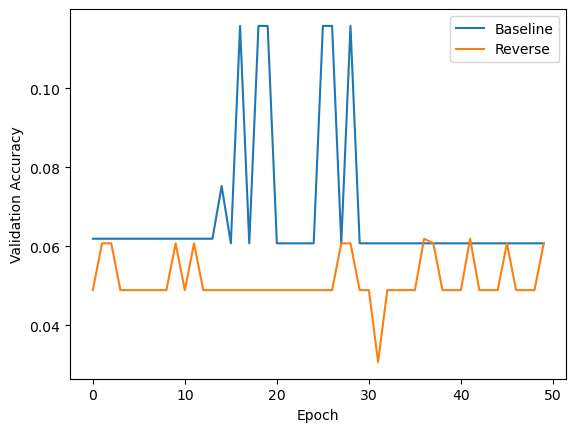

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='Baseline')
plt.plot(history_reverse.history['val_accuracy'], label='Reverse')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
